In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_AirBNB = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df_AirBNB.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


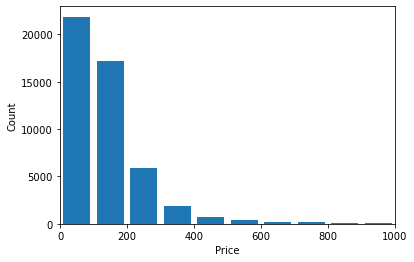

In [32]:
plt.hist(df_AirBNB.price, bins=100, rwidth=0.8)
plt.xlabel('Price') 
plt.ylabel('Count')
plt.xlim([0,1000])
plt.show()

<AxesSubplot:ylabel='Density'>

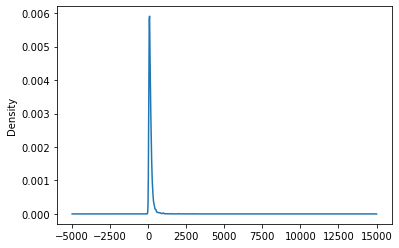

In [28]:
df_AirBNB['price'].plot.kde()

In [30]:
# Price Column with mean,standard deviation and other insights 
df_AirBNB.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [58]:
# Detect outliers using percentile and using quantile function
lower_limit, upper_limit = df_AirBNB.price.quantile([0.001,0.999])
lower_limit, upper_limit

(18.0, 3000.0)

In [59]:
price = df_AirBNB['price']

In [53]:
#df_AirBNB[price<lower_limit]

In [54]:
clean_df = df_AirBNB[(price>lower_limit)&(price<upper_limit)]
#clean_df

<AxesSubplot:ylabel='Frequency'>

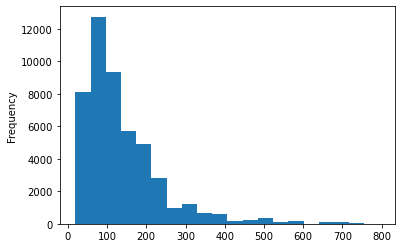

In [57]:
clean_df['price'].plot.hist(bins = 20)

In [48]:
clean_df.shape

(48792, 16)

In [60]:
#Ny metode for å fjerne øvre og nedre grense
upperlimit = 0.99
lowerlimit = 0.001

minTreshold, maxTreshold = df_AirBNB.price.quantile([lowerlimit,upperlimit])
minTreshold,maxTreshold

(18.0, 799.0)

In [64]:
cheapAirBNB = df_AirBNB[(price>minTreshold)&(price<maxTreshold)]
cheapAirBNB = cheapAirBNB['price']

<AxesSubplot:ylabel='Frequency'>

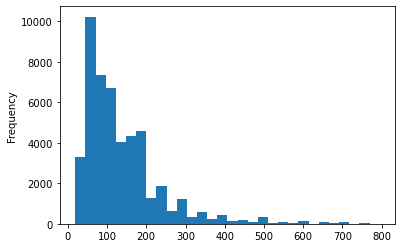

In [72]:
cheapAirBNB.plot.hist(bins = 30)

In [74]:
import seaborn as sns

<AxesSubplot:xlabel='price'>

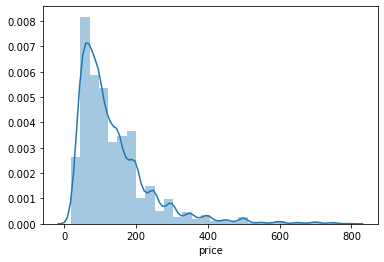

In [77]:
sns.distplot(cheapAirBNB, bins=30, kde=True)